## Import CMIP6 output

In [2]:
import intake

/ncar/usr/jupyterhub/envs/cmip6-201910a/lib/python3.7/site-packages/intake/source/discovery.py:136: FutureWarning: The drivers ['stac-catalog', 'stac-collection', 'stac-item'] do not specify entry_points and were only discovered via a package scan. This may break in a future release of intake. The packages should be updated.
  FutureWarning)


In [3]:
catalog = intake.open_esm_datastore("../catalogs/pangeo-cmip6.json")

In [4]:
sr_ssp_nbp = catalog.search(experiment_id='ssp585', variable_id='nbp')
sr_ssp_nbp

pangeo-cmip6-ESM Collection with 65 entries:
	> 1 activity_id(s)

	> 6 institution_id(s)

	> 7 source_id(s)

	> 1 experiment_id(s)

	> 56 member_id(s)

	> 1 table_id(s)

	> 1 variable_id(s)

	> 2 grid_label(s)

	> 65 zstore(s)

	> 0 dcpp_init_year(s)

In [5]:
sr_ssp_nbp.unique('source_id')

{'source_id': {'count': 7,
  'values': ['CanESM5',
   'CNRM-ESM2-1',
   'IPSL-CM6A-LR',
   'MIROC-ES2L',
   'UKESM1-0-LL',
   'CESM2-WACCM',
   'CESM2']}}

In [6]:
sr_ssp_nbp_models = catalog.search(experiment_id='ssp585', variable_id='nbp', source_id=['CanESM5', 'CESM2'])
sr_ssp_nbp_models

pangeo-cmip6-ESM Collection with 52 entries:
	> 1 activity_id(s)

	> 2 institution_id(s)

	> 2 source_id(s)

	> 1 experiment_id(s)

	> 50 member_id(s)

	> 1 table_id(s)

	> 1 variable_id(s)

	> 1 grid_label(s)

	> 52 zstore(s)

	> 0 dcpp_init_year(s)

In [7]:
sr_ssp_nbp_models.search(source_id='CESM2').unique('member_id') # only two ensemble members for CESM2

{'member_id': {'count': 2, 'values': ['r1i1p1f1', 'r2i1p1f1']}}

In [23]:
sr_ssp_nbp_models_mems = catalog.search(experiment_id='ssp585', 
                                        variable_id='nbp', source_id=['CanESM5', 'CESM2'],
                                        member_id = ['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1'])
#sr_ssp_nbp_models_mems.search(source_id='CanESM5').unique('member_id')
sr_ssp_nbp_models_mems

pangeo-cmip6-ESM Collection with 5 entries:
	> 1 activity_id(s)

	> 2 institution_id(s)

	> 2 source_id(s)

	> 1 experiment_id(s)

	> 3 member_id(s)

	> 1 table_id(s)

	> 1 variable_id(s)

	> 1 grid_label(s)

	> 5 zstore(s)

	> 0 dcpp_init_year(s)

In [11]:
sr_fx = catalog.search(table_id = ['fx'], source_id = ['CanESM5','CESM2'], 
                       experiment_id='ssp585'), member_id = ['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1'])
sr_fx.unique('variable_id')

{'variable_id': {'count': 1, 'values': ['areacella']}}

In [ ]:
sr_fx_ctrl_vars = catalog.search(table_id = ['fx'], source_id = ['CanESM5','CESM2'], 
                                 member_id = ['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1'], 
                                 experiment_id = 'historical', variable_id = ['areacella', 'sftlf'])
sr_fx_ctrl_vars

In [13]:
fx_ds = sr_fx_ctrl_vars.to_dataset_dict()

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 2 group(s)


In [14]:
fx_ds.keys()

dict_keys(['CMIP.CCCma.CanESM5.historical.fx.gn', 'CMIP.NCAR.CESM2.historical.fx.gn'])

In [16]:
fx_ds_cesm = fx_ds['CMIP.NCAR.CESM2.historical.fx.gn']
landfrac_cesm = fx_ds_cesm.sftlf
area_cesm = fx_ds_cesm.areacella
#area_cesm.units # area in m^2
#landfrac_cesm.units # landfrac in % so divide by 100 to get frac
#landfrac_cesm.values

'%'

In [17]:
landfrac_cesm_frac = landfrac_cesm / 100
#landfrac_cesm_frac.values

In [19]:
fx_ds_canesm = fx_ds['CMIP.CCCma.CanESM5.historical.fx.gn']
landfrac_canesm = fx_ds_canesm.sftlf
area_canesm = fx_ds_canesm.areacella
#area_canesm.units # area in m^2
#landfrac_canesm.units # landfrac in % so divide by 100 to get frac
#landfrac_canesm.values

'%'

In [22]:
landfrac_canesm_frac = landfrac_canesm / 100
#landfrac_canesm_frac.values

In [24]:
ssp_nbp_ds = sr_ssp_nbp_models_mems.to_dataset_dict()

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 2 group(s)


In [25]:
ssp_nbp_ds.keys()

dict_keys(['ScenarioMIP.CCCma.CanESM5.ssp585.Lmon.gn', 'ScenarioMIP.NCAR.CESM2.ssp585.Lmon.gn'])

In [27]:
nbp_ds_canesm = ssp_nbp_ds['ScenarioMIP.CCCma.CanESM5.ssp585.Lmon.gn']
nbp_canesm = nbp_ds_canesm.nbp
nbp_cesm = ssp_nbp_ds['ScenarioMIP.NCAR.CESM2.ssp585.Lmon.gn'].nbp

In [28]:
nbp_canesm.sel(lat='-50', lon='90', method='nearest')[0,:].values

array([-2.7006740e-16,  2.9363469e-17, -2.1477115e-16, ...,
       -6.4855015e-16, -6.5682937e-16,  4.5579129e-16], dtype=float32)

In [29]:
nbp_cesm.sel(lat='-50', lon='90', method='nearest')[0,:].values

array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)

In [30]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def weighted_annual_mean(array):
    mon_day  = xr.DataArray(np.array([31,28,31,30,31,30,31,31,30,31,30,31]), dims=['month'])
    mon_wgt  = mon_day/mon_day.sum()
    return (array.rolling(time=12, center=False) # rolling
            .construct("month") # construct the array
            .isel(time=slice(11, None, 12)) # slice so that the first element is [1..12], second is [13..24]
            .dot(mon_wgt, dims=["month"]))

In [32]:
spy = 365 * 24 * 3600  # Convert  to annual fluxes (kgC/m2/y), from kgC/m2/s 

In [33]:
nbp_canesm_amean = weighted_annual_mean(nbp_canesm) * spy
nbp_canesm_amean.attrs['units'] = 'kgC m-2 y-1'
nbp_canesm_amean # 3 ensemble members for CanESM

<xarray.DataArray (member_id: 3, time: 286, lat: 64, lon: 128)>
dask.array<mul, shape=(3, 286, 64, 128), dtype=float64, chunksize=(1, 50, 64, 128), chunktype=numpy.ndarray>
Coordinates:
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * time       (time) object 2015-12-16 12:00:00 ... 2300-12-16 12:00:00
  * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * member_id  (member_id) <U8 'r1i1p1f1' 'r2i1p1f1' 'r3i1p1f1'
Attributes:
    units:    kgC m-2 y-1

In [34]:
nbp_cesm_amean = weighted_annual_mean(nbp_cesm) * spy
nbp_cesm_amean.attrs['units'] = 'kgC m-2 y-1'
nbp_cesm_amean # 2 ensemble members for CESM

<xarray.DataArray (member_id: 2, time: 86, lat: 192, lon: 288)>
dask.array<mul, shape=(2, 86, 192, 288), dtype=float64, chunksize=(1, 50, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 2015-12-15 12:00:00 ... 2100-12-15 12:00:00
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * member_id  (member_id) <U8 'r1i1p1f1' 'r2i1p1f1'
Attributes:
    units:    kgC m-2 y-1

In [52]:
landUp_cesm = area_cesm * landfrac_cesm_frac
print(landUp_cesm.values)
landUp_canesm = area_canesm * landfrac_canesm_frac

[[[2.9948368e+07 2.9948368e+07 2.9948368e+07 ... 2.9948368e+07
   2.9948368e+07 2.9948368e+07]
  [2.3957478e+08 2.3957478e+08 2.3957478e+08 ... 2.3957478e+08
   2.3957478e+08 2.3957478e+08]
  [4.7908477e+08 4.7908477e+08 4.7908477e+08 ... 4.7908477e+08
   4.7908477e+08 4.7908477e+08]
  ...
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]]

 [[2.9948368e+07 2.9948368e+07 2.9948368e+07 ... 2.9948368e+07
   2.9948368e+07 2.9948368e+07]
  [2.3957478e+08 2.3957478e+08 2.3957478e+08 ... 2.3957478e+08
   2.3957478e+08 2.3957478e+08]
  [4.7908477e+08 4.7908477e+08 4.7908477e+08 ... 4.7908477e+08
   4.7908477e+08 4.7908477e+08]
  ...
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.000

In [38]:
# check lat diffs - again CESM needs correction
latdiffs = landUp_cesm.lat.values - nbp_cesm_amean.lat.values
#latdiffs

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [40]:
landUp_cesm_modlat = landUp_cesm # create new landUp
landUp_cesm_modlat.lat.values = nbp_cesm_amean.lat.values # just assign landUp lats to match nbp lats
#print(landUp_cesm_modlat.lat.values - nbp_cesm_amean.lat.values) # sanity check

In [41]:
mean_wgt_cesm = nbp_cesm_amean * landUp_cesm_modlat
mean_wgt_cesm # 2 EMs

<xarray.DataArray (member_id: 2, time: 86, lat: 192, lon: 288)>
dask.array<mul, shape=(2, 86, 192, 288), dtype=float64, chunksize=(1, 50, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * member_id  (member_id) object 'r1i1p1f1' 'r2i1p1f1'
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 2015-12-15 12:00:00 ... 2100-12-15 12:00:00
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0

In [42]:
ann_glob_cesm = mean_wgt_cesm.sum(dim=('lat','lon')) * 1e-12 #convert to Pg/y
ann_glob_cesm.attrs['units'] = 'Pg C y^-1'

In [43]:
mean_wgt_canesm = nbp_canesm_amean * landUp_canesm
mean_wgt_canesm # 3 EMs, 1 out to 2300!

<xarray.DataArray (member_id: 3, time: 286, lat: 64, lon: 128)>
dask.array<mul, shape=(3, 286, 64, 128), dtype=float64, chunksize=(1, 50, 64, 128), chunktype=numpy.ndarray>
Coordinates:
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * time       (time) object 2015-12-16 12:00:00 ... 2300-12-16 12:00:00
  * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * member_id  (member_id) <U8 'r1i1p1f1' 'r2i1p1f1' 'r3i1p1f1'

In [44]:
ann_glob_canesm = mean_wgt_canesm.sum(dim=('lat','lon')) * 1e-12 #convert to Pg/y
ann_glob_canesm.attrs['units'] = 'Pg C y^-1'

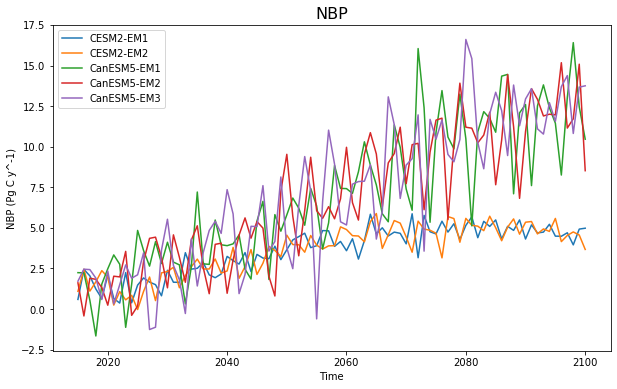

In [50]:
fig = plt.figure(figsize=(10, 6))

# Ask, out of a 1x1 grid, the first axes.
ax = fig.add_subplot(1, 1, 1)

# Plot times as x-variable and temperatures as y-variable
ax.plot(ann_glob_cesm.coords['time.year'], ann_glob_cesm[0,:], label='CESM2-EM1')
ax.plot(ann_glob_cesm.coords['time.year'], ann_glob_cesm[1,:], label='CESM2-EM2')
ax.plot(ann_glob_canesm.coords['time.year'][:86], ann_glob_canesm[0,:86], label='CanESM5-EM1')
ax.plot(ann_glob_canesm.coords['time.year'][:86], ann_glob_canesm[1,:86], label='CanESM5-EM2')
ax.plot(ann_glob_canesm.coords['time.year'][:86], ann_glob_canesm[2,:86], label='CanESM5-EM3')
# Add some labels to the plot
ax.set_xlabel('Time')
ax.set_ylabel('NBP'+' (' + ann_glob_cesm.attrs['units'] +')')
ax.set_title('NBP', fontdict={'size':16})
ax.legend(loc='upper left');
#plt.savefig('cesm_canesm_ssp585_nbp.pdf')